# Imports and data

In [320]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [321]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [322]:
def load_data():
    df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
    df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
    return df_train, df_test

In [323]:
df_train, df_test = load_data()

# EDA

In [324]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [325]:
df_train = df_train.drop(['id'],axis=1)
df_test = df_test.drop(['id'],axis=1)

In [326]:
df_train.shape, df_test.shape

((20758, 17), (13840, 16))

In [327]:
df_train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [328]:
df_test.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


No missing values! Yay!

In [329]:
df_train.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [330]:
df_train.nunique()

Gender                               2
Age                               1703
Height                            1833
Weight                            1979
family_history_with_overweight       2
FAVC                                 2
FCVC                               934
NCP                                689
CAEC                                 4
SMOKE                                2
CH2O                              1506
SCC                                  2
FAF                               1360
TUE                               1297
CALC                                 3
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [331]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: title={'center': 'Outlier analysis'}>

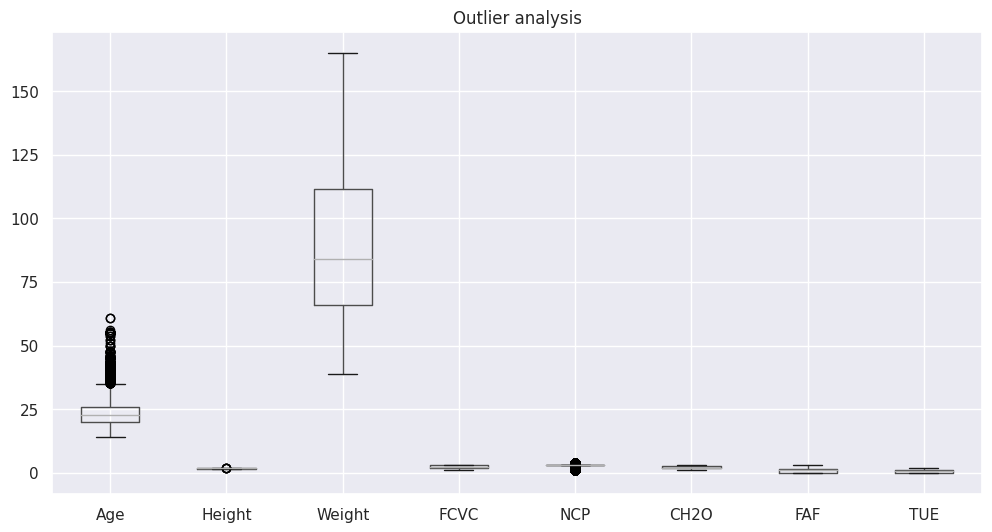

In [332]:
plt.figure(figsize=(12, 6))
plt.title('Outlier analysis')
df_train.loc[:, ].boxplot()

In [333]:
onehot_cols = [
    "CAEC",
    "CALC",
    "MTRANS"
]

binary_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "SMOKE",
    "SCC",
]

label_cols = [
    "NObeyesdad"
]

scale_cols = [
    "Age",
    "Height",
    "Weight",
    "FCVC",
    "NCP",
    "CH2O",
    "FAF",
    "TUE"
]

In [334]:
X, y = df_train.drop(label_cols, axis=1), df_train['NObeyesdad']

In [337]:
def transform_target(y: pd.Series) -> np.ndarray:
    """
    Something smart.
    """
    le = LabelEncoder()
    return le.fit_transform(y)

In [338]:
y = transform_target(y)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)
X_val, X_holdout, y_val, y_holdout = train_test_split(X_temp, y_temp, random_state=42, train_size=0.5)

In [360]:
def construct_pipeline():
    """
    Something smart.
    """
    one_hot_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    binary_transformer = Pipeline(steps=[
        ('binary', OrdinalEncoder())
    ])

    standard_scaler = Pipeline(steps=[
        ('standard_scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', one_hot_transformer, onehot_cols),
        ('binary', binary_transformer, binary_cols),
        ('standard_scaler', standard_scaler, scale_cols)],
        remainder='passthrough')
    
    return preprocessor

In [361]:
n_jobs = -1
max_depth = None

model_list = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=max_depth)),
    ('Random Forest', RandomForestClassifier(max_depth=max_depth,
                                             n_jobs = n_jobs)),
    ('Extra Trees', ExtraTreesClassifier(max_depth=max_depth))
]

for model_descr, estimator in model_list:
    pipe = Pipeline(
        [
            ('preprocess',construct_pipeline()),
            ('classifier',estimator)
        ]
    )
    
    pipe_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_micro')
    print(f"{model_descr}: {pipe_scores.mean():.2%}")

Decision Tree: 84.28%
Random Forest: 89.57%
Extra Trees: 86.54%


In [343]:
def get_best_params(classifier, param_grid, X, y):
    """
    Something smart.
    """
    pipe = Pipeline(steps=
        [
            ('preprocessor', construct_pipeline()),
            ('classifier', RandomForestClassifier(n_jobs = n_jobs))
        ]
    )

    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_micro', verbose=1)
    grid_search.fit(X_val, y_val)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best parameters:", best_params)
    print("Best score:", best_score)

    return best_params

In [344]:
param_grid = {
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__max_depth': [3, 5, 10]
}

best_params = get_best_params(RandomForestClassifier(n_jobs = n_jobs), 
                              param_grid,
                              X_val,
                              y_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 500}
Best score: 0.8708989805375348


In [362]:
pipe = Pipeline(
    [
        ('preprocess',construct_pipeline()),
        ('classifier',RandomForestClassifier(n_jobs=n_jobs, 
                                             max_depth=best_params['classifier__max_depth'], 
                                             n_estimators=best_params['classifier__n_estimators']))
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CAEC', 'CALC', 'MTRANS']),
                                                 ('binary',
                                                  Pipeline(steps=[('binary',
                                                                   OrdinalEncoder())]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC']),
                                                 ('standard_scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=500,
                                        n_jobs=-1))])

In [346]:
y_pred = pipe.predict(X_holdout)

print("F1_micro:", f1_score(y_holdout, y_pred, average='micro'))
print(classification_report(y_holdout, y_pred))

F1_micro: 0.884393063583815
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       244
           1       0.78      0.87      0.82       311
           2       0.89      0.86      0.88       274
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       407
           5       0.81      0.66      0.73       238
           6       0.77      0.81      0.79       266

    accuracy                           0.88      2076
   macro avg       0.87      0.87      0.87      2076
weighted avg       0.89      0.88      0.88      2076



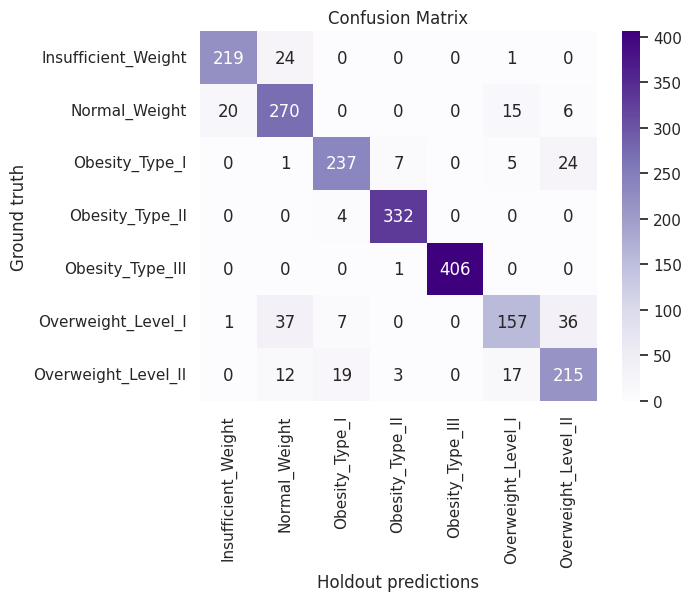

<Figure size 1500x800 with 0 Axes>

In [347]:
cm = confusion_matrix(y_holdout, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Holdout predictions')
plt.ylabel('Ground truth')
plt.figure(figsize=(15, 8))

plt.show()

In [367]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
sample_submission.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [363]:
y_pred = pipe.predict(df_test)

In [364]:
inverse_y_pred = le.inverse_transform(y_pred)

In [368]:
sample_submission['NObeyesdad'] = inverse_y_pred
sample_submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [372]:
sample_submission.to_csv('submission.csv', index=False)